In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [7]:
train_labels[10]

3

In [9]:
# import numpy as np 
# def vectorize_sequences(sequences, dimension=10000):
#     results = np.zeros((len(sequences), dimension))
#     for i, sequence in enumerate(sequences):
#         for j in sequence:
#             results[i, j] = 1.
#     return results
# x_train = vectorize_sequences(train_data) 
# x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels) 
y_test = to_one_hot(test_labels)

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [15]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])

In [16]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [18]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 35ms/step - loss: 2.7741 - accuracy: 0.4964 - val_loss: 1.9473 - val_accuracy: 0.5740
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.6305 - accuracy: 0.6468 - val_loss: 1.4511 - val_accuracy: 0.6790
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.2512 - accuracy: 0.7270 - val_loss: 1.2552 - val_accuracy: 0.7110
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 1.0347 - accuracy: 0.7747 - val_loss: 1.1484 - val_accuracy: 0.7520
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8664 - accuracy: 0.8157 - val_loss: 1.0667 - val_accuracy: 0.7580
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.7353 - accuracy: 0.8416 - val_loss: 1.0012 - val_accuracy: 0.7840
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6220 - accuracy: 0.8698 - val_loss: 0.9515 - val_accuracy: 0.8070
Epoch 8/20
16

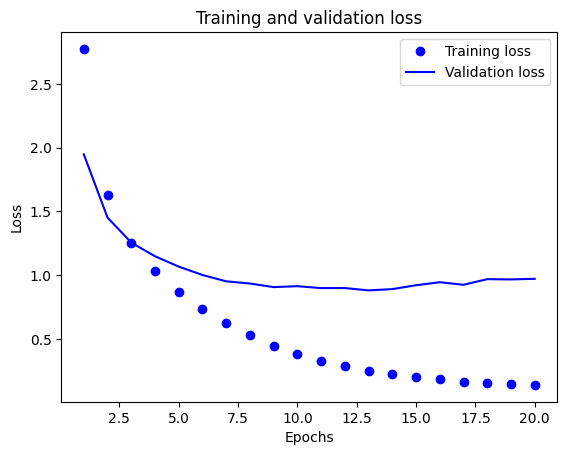

In [20]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

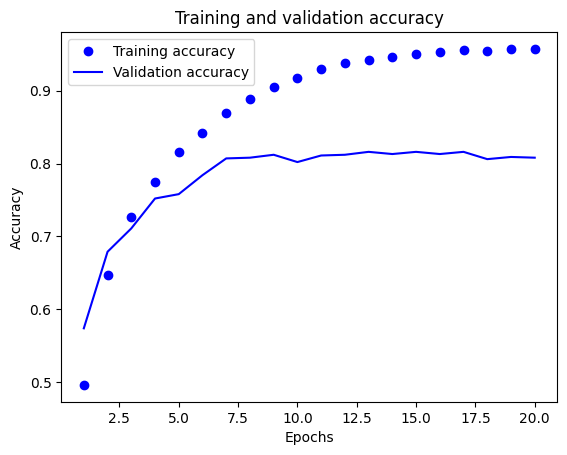

In [21]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
model = keras.Sequential([
                            layers.Dense(64, activation="relu"),
                            layers.Dense(64, activation="relu"),
                            layers.Dense(46, activation="softmax")
                        ])
model.compile(optimizer="rmsprop",
            loss="categorical_crossentropy",
            metrics=["accuracy"]
            )
model.fit(x_train,y_train,epochs=9,batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 19ms/step - loss: 2.4814 - accuracy: 0.5071
Epoch 2/9
18/18 [==============================] - 0s 18ms/step - loss: 1.4317 - accuracy: 0.6892
Epoch 3/9
18/18 [==============================] - 0s 23ms/step - loss: 1.1067 - accuracy: 0.7572
Epoch 4/9
18/18 [==============================] - 1s 28ms/step - loss: 0.8925 - accuracy: 0.8017
Epoch 5/9
18/18 [==============================] - 0s 18ms/step - loss: 0.7275 - accuracy: 0.8420
Epoch 6/9
18/18 [==============================] - 0s 18ms/step - loss: 0.6019 - accuracy: 0.8725
Epoch 7/9
18/18 [==============================] - 0s 18ms/step - loss: 0.4942 - accuracy: 0.8959
Epoch 8/9
18/18 [==============================] - 0s 24ms/step - loss: 0.4166 - accuracy: 0.9119
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9111 - accuracy: 0.7885


In [23]:
results

[0.9111035466194153, 0.7885128855705261]

In [25]:
x_test.shape
# model.predict(x_test[0].reshape(1,10000))

(2246, 10000)

In [52]:
p=model.predict(x_test[0].reshape(1,10000))

1/1 [==============================] - 0s 22ms/step


In [53]:
p

array([[6.42376181e-05, 2.15819702e-04, 3.09028372e-04, 4.43978220e-01,
        5.19725144e-01, 5.80256301e-06, 8.53766687e-05, 1.91974163e-04,
        3.49987904e-03, 6.82259415e-05, 2.09556310e-04, 5.71073173e-03,
        3.89365632e-05, 1.96915702e-04, 6.10714269e-05, 2.74012255e-05,
        1.30775627e-02, 3.20200517e-04, 9.50670103e-04, 7.02508318e-04,
        3.09893116e-03, 8.15452251e-04, 2.89235963e-04, 4.90004459e-05,
        1.76018111e-05, 6.20679566e-05, 8.57429040e-06, 2.42330934e-04,
        6.17416081e-05, 8.13364459e-04, 3.38022131e-04, 4.80458402e-04,
        7.72445346e-05, 4.54517658e-06, 3.61750368e-04, 1.64357098e-05,
        2.00036695e-04, 1.21218345e-05, 9.32425974e-05, 3.15815699e-03,
        2.15341497e-05, 1.04743936e-04, 1.76525282e-04, 4.29042557e-05,
        9.03925684e-06, 5.58427882e-06]], dtype=float32)

In [54]:
p.sort()

In [55]:
p

array([[4.54517658e-06, 5.58427882e-06, 5.80256301e-06, 8.57429040e-06,
        9.03925684e-06, 1.21218345e-05, 1.64357098e-05, 1.76018111e-05,
        2.15341497e-05, 2.74012255e-05, 3.89365632e-05, 4.29042557e-05,
        4.90004459e-05, 6.10714269e-05, 6.17416081e-05, 6.20679566e-05,
        6.42376181e-05, 6.82259415e-05, 7.72445346e-05, 8.53766687e-05,
        9.32425974e-05, 1.04743936e-04, 1.76525282e-04, 1.91974163e-04,
        1.96915702e-04, 2.00036695e-04, 2.09556310e-04, 2.15819702e-04,
        2.42330934e-04, 2.89235963e-04, 3.09028372e-04, 3.20200517e-04,
        3.38022131e-04, 3.61750368e-04, 4.80458402e-04, 7.02508318e-04,
        8.13364459e-04, 8.15452251e-04, 9.50670103e-04, 3.09893116e-03,
        3.15815699e-03, 3.49987904e-03, 5.71073173e-03, 1.30775627e-02,
        4.43978220e-01, 5.19725144e-01]], dtype=float32)

In [56]:
5.19725144e-01

0.519725144

In [57]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [58]:
predictions.shape

(2246, 46)

In [59]:
predictions[0].shape

(46,)

In [60]:
np.sum(predictions[0])

0.9999999

In [61]:
np.argmax(predictions[0])

4

In [62]:
y_test[0]

3